In [186]:
!scp ghpcc:~/contig_cis_matrix.csv ./

contig_cis_matrix.csv                         100%  699KB   9.6MB/s   00:00    


In [187]:
!tail contig_cis_matrix.csv


U54-HFF-plate-DSG-HindIII-20160226-R1-T1 chrUn_GL000218v1 143226547 1047
U54-HFF-plate-DSG-MNase-20190509-R2-T1 chrUn_GL000218v1 191818051 670
U54-HFF-plate-EGS-DdeI-20161031-R1-T1 chrUn_GL000218v1 207979631 364
U54-HFF-plate-EGS-DpnII-20160902-R1-T1 chrUn_GL000218v1 204078240 492
U54-HFF-plate-EGS-HindIII-20190718-R2-T1 chrUn_GL000218v1 209839776 335
U54-HFF-plate-EGS-MNase-20190509-R2-T1 chrUn_GL000218v1 185701606 760
U54-HFF-plate-FA-DdeI-20170119-R2-T1 chrUn_GL000218v1 157229847 274
U54-HFF-plate-FA-DpnII-20180904-R1-T1 chrUn_GL000218v1 180559079 281
U54-HFF-plate-FA-HindIIII-20160226-R2-T1 chrUn_GL000218v1 202269739 1037
U54-HFF-plate-FA-MNase-20190509-R2-T1 chrUn_GL000218v1 155081327 450


In [3]:
# # i had to install this beauty https://github.com/matplotlib/ipympl
# # to make following to work ...
# %matplotlib widget
# import ipywidgets as widgets

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns

import numpy as np

from io import StringIO


# make pandas display entire dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
from scipy.cluster.vq import kmeans2, whiten

In [5]:
df = pd.read_csv("contig_cis_matrix.csv",sep=" ",header=None,names=["sample","contig","tot","cis_count"])


def parse_u54_names(name_split):
    celltype = name_split[1]
    if celltype in ["END","ESC"]:
        ret = {"cell":celltype, "cycle": "NS", "cross":name_split[2], "enzyme":name_split[3]}
    elif celltype == "HFF":
        ret = {"cell":celltype, "cycle": "NS", "cross":name_split[3], "enzyme":name_split[4]}
    elif celltype == "HelaS3":
        ret = {"cell":celltype, "cycle": name_split[2], "cross":name_split[3], "enzyme":name_split[4]}
    return pd.Series(ret)

cell_cycle_cross_enzyme = df["sample"].str.split("-").apply(parse_u54_names)


dff = df.merge(cell_cycle_cross_enzyme,left_index=True,right_index=True)

dff["fcis"] = dff["cis_count"]/dff["tot"]

In [6]:
dff.head(3)

,sample,contig,tot,cis_count,cell,cycle,cross,enzyme,fcis
0,U54-END-DSG-DdeI-20161031-R1-T1,chr1_KI270706v1_random,205924091,260.0,END,NS,DSG,DdeI,0.000001
1,U54-END-DSG-DpnII-20190711-R2-T1,chr1_KI270706v1_random,210572905,238.0,END,NS,DSG,DpnII,0.000001
2,U54-END-DSG-HindIII-20161206-R1-T1,chr1_KI270706v1_random,229896147,398.0,END,NS,DSG,HindIII,0.000002


[1 0 1 2 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 4 4 4 4 4 4 0 0 4 4
 4 4 2 4 4 4 4 2 0 0 0 5 3 0 5 5 1 5 5 1 3 3 5 0 0 5]
cluster 0
MultiIndex([(   'DdeI', 'NS',    'END', 'EGS'),
            (   'DdeI', 'NS',    'ESC', 'EGS'),
            (  'DpnII', 'G1', 'HelaS3', 'DSG'),
            (  'DpnII', 'G1', 'HelaS3', 'EGS'),
            (  'DpnII', 'G1', 'HelaS3',  'FA'),
            (  'DpnII',  'M', 'HelaS3', 'DSG'),
            (  'DpnII',  'M', 'HelaS3', 'EGS'),
            (  'DpnII',  'M', 'HelaS3',  'FA'),
            (  'DpnII', 'NS', 'HelaS3', 'DSG'),
            (  'DpnII', 'NS', 'HelaS3', 'EGS'),
            (  'DpnII', 'NS', 'HelaS3',  'FA'),
            ('HindIII', 'NS',    'END', 'DSG'),
            ('HindIII', 'NS',    'END', 'EGS'),
            (  'MNase', 'G1', 'HelaS3', 'DSG'),
            (  'MNase', 'G1', 'HelaS3', 'EGS'),
            (  'MNase', 'G1', 'HelaS3',  'FA'),
            (  'MNase',  'M', 'HelaS3',  'FA'),
            (  'MNase', 'NS', 'HelaS3', 'DSG'

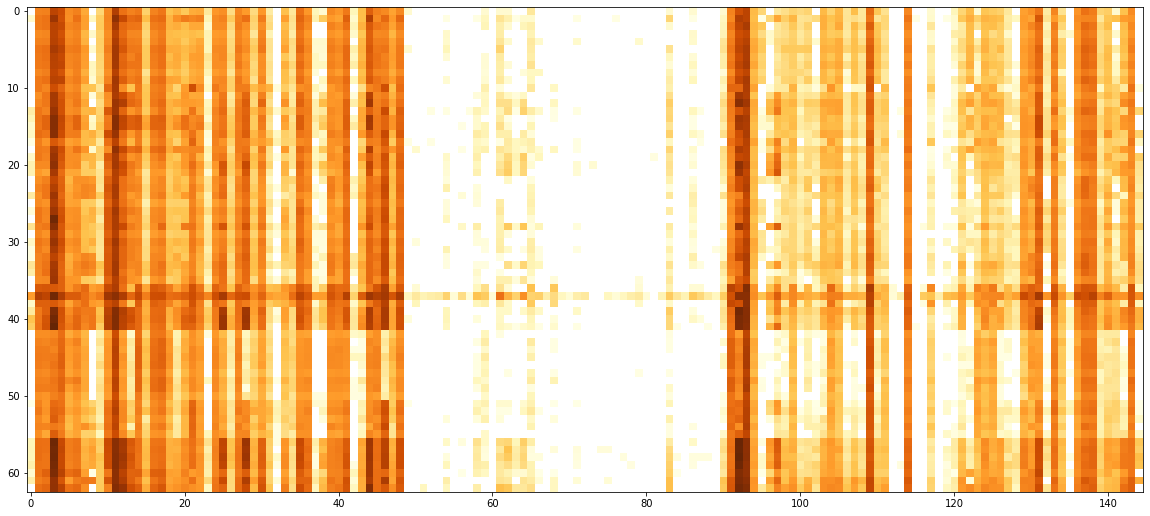

In [7]:
i1 = ["cycle","cell","cross","enzyme"]
i1 = ["cycle","cell","cross","enzyme"]
i1 = ["cycle","cell","cross","enzyme"]
i1 = ["cycle","cell","cross","enzyme"]
i2 = ["enzyme","cross","cycle","cell"]
i3 = ["cross","enzyme","cycle","cell"]

i4 = ["enzyme","cycle","cell","cross"]


mmm = dff.pivot_table(values="fcis",index=i4,columns="contig")


zzz = np.log(mmm.values)
zzz = np.nan_to_num(zzz)
zwzw = whiten(zzz)

num_clust = 6

c,l = kmeans2(zwzw,num_clust,iter=10000,minit="points")

print(l)
clst_idx = np.argsort(l)

for i in range(num_clust):
    print(f"cluster {i}")
    print(mmm.index[l==i])
    print(mmm.index[l==i].to_frame().describe())

plt.imshow(np.log(mmm.iloc[clst_idx].values),cmap="YlOrBr")
plt.gcf().set_size_inches(20,15)

In [8]:
dff.pivot_table(values="fcis",index=["enzyme","cycle","cell","cross"],columns="contig").idxmax(axis=1).unique()

array(['chr14_GL000225v1_random', 'chr17_GL000205v2_random',
       'chrUn_KI270442v1', 'chrUn_KI270438v1'], dtype=object)

3 chr14_GL000225v1_random
11 chr17_GL000205v2_random
93 chrUn_KI270442v1
92 chrUn_KI270438v1


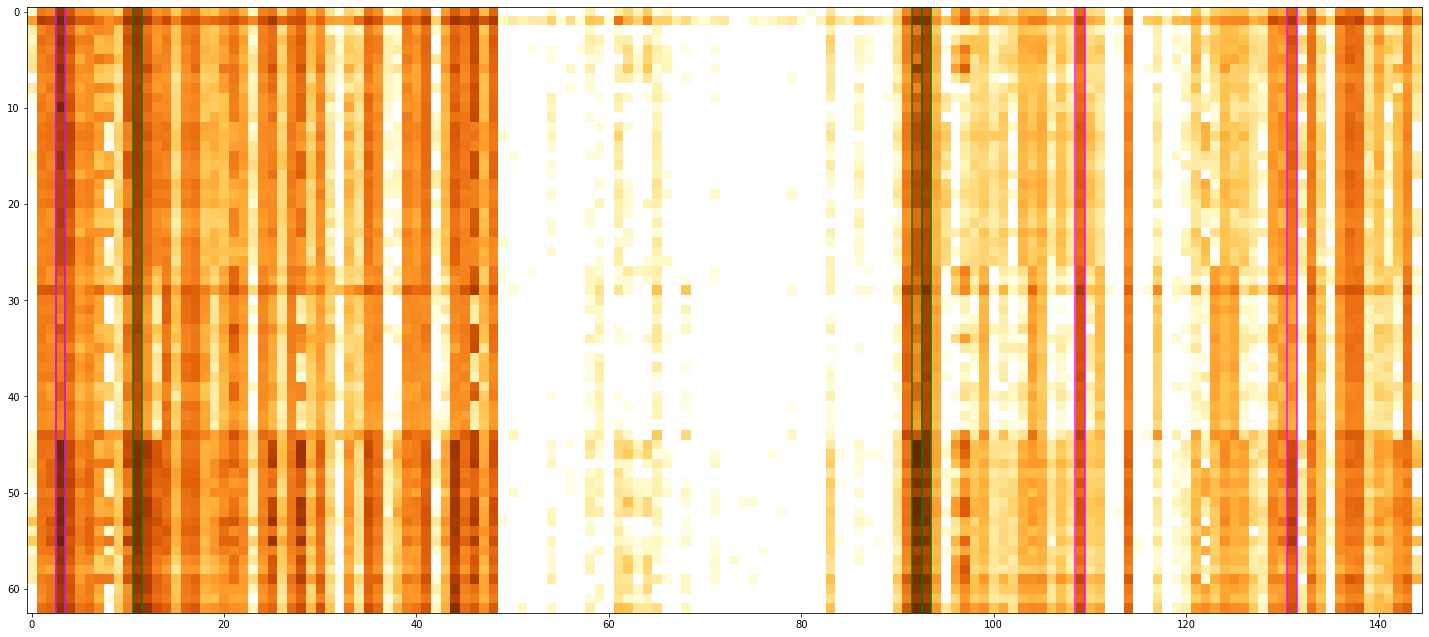

In [9]:
i1 = ["enzyme","cycle","cell","cross"]
i2 = ["cycle","cell","enzyme","cross"]
i3 = ["cycle","cell","cross","enzyme"]
i4 = ["enzyme","cell","cycle","cross"]
i5 = ["enzyme","cross","cell","cycle"]

i_order = i5


mat = dff.pivot_table(values="fcis",index=i_order,columns="contig")
# dff.sort_values(by=["enzyme","cycle","cell","cross"]).pivot(index="sample",columns="contig",values="fcis").values
cbar = plt.imshow(np.log(mat),cmap="YlOrBr")

for v in dff.pivot_table(values="fcis",index=i_order,columns="contig").idxmax(axis=1).unique():
    print(np.searchsorted(mat.columns,v),v)
    plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="green")
    plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="green")

# v = "chr15_KI270727v1_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="blue")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="blue")
 
    
# v = "chr22_KI270734v1_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="blue")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="blue")

# v = "chr17_KI270730v1_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="blue")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="blue")

# v = "chr1_KI270707v1_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="blue")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="blue")


# v = "chrUn_GL000195v1"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")

# v = "chr2_KI270716v1_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")

# v = "chr17_GL000205v2_random"
# plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
# plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")

v = "chr14_GL000225v1_random"
plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")

v = "chrUn_KI270519v1"
plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")

v = "chrUn_KI270744v1"
plt.gca().axvline(np.searchsorted(mat.columns,v)-0.5,alpha=0.99,linewidth=1.5,color="magenta")
plt.gca().axvline(np.searchsorted(mat.columns,v)+0.5,alpha=0.99,linewidth=1.5,color="magenta")


# plt.colorbar(cbar)

plt.gcf().set_size_inches(25,17)

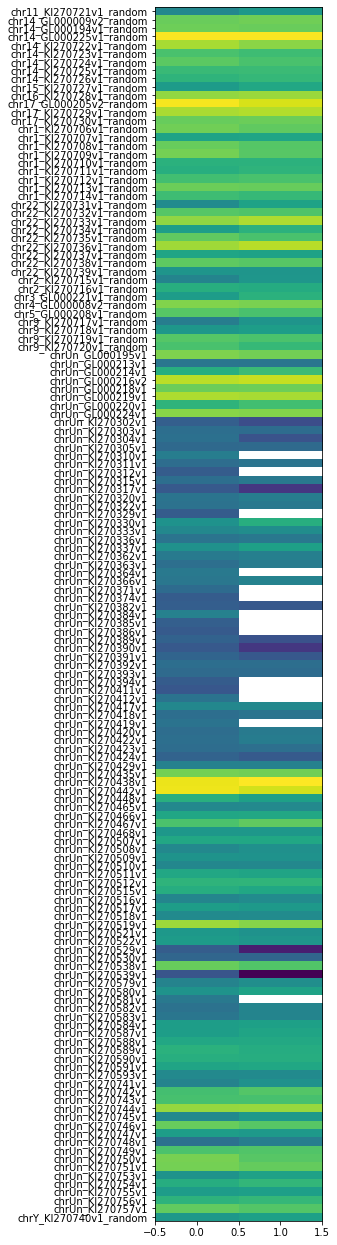

In [10]:
plt.imshow(np.log(pd.merge(pd.DataFrame(mat.mean()), pd.DataFrame(mat.std()),left_index=True,right_index=True)),aspect=0.1)
# plt.plot((mat.std()),mat.mean(),'ro')

plt.gcf().set_size_inches(3,33)

plt.gca().set_yticks(range(len(mat.mean())));
plt.gca().set_yticklabels(mat.mean().index);

#### let's try to see where contigs belong to ...

```sh
for f in *.dedup.stats;
do
    for l in $(cat ~/contigs2);
    do
        ff=$(echo $f | cut -f1 -d'_');
        ttt=$(grep total_nodups $f| cut -f2);
        grep -P "($l\/chr[[:alnum:]]*\t|chr[[:alnum:]]*\/$l\t)" $f |awk -v tot=$ttt -v nam=$ff -F'/' '{print nam"\t"tot"\t"$2"\t"$3 }';
    done;
done > ~/trans_mat.tsv

```

we're extracting number of interactions of every contig with every "normal" chromosome for every sample ...

In [292]:
!scp ghpcc:~/trans_mat.tsv ./

trans_mat.tsv                                 100%   11MB  23.0MB/s   00:00    


In [317]:
!head trans_mat.tsv


U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr1	chr1_KI270706v1_random	333
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr10	chr1_KI270706v1_random	94
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr11	chr1_KI270706v1_random	87
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr12	chr1_KI270706v1_random	98
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr13	chr1_KI270706v1_random	81
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr14	chr1_KI270706v1_random	69
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr15	chr1_KI270706v1_random	58
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr16	chr1_KI270706v1_random	69
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr17	chr1_KI270706v1_random	73
U54-END-DSG-DdeI-20161031-R1-T1	205924091	chr18	chr1_KI270706v1_random	58


In [11]:
df = pd.read_csv("trans_mat.tsv",sep="\t",header=None,names=["sample","tot","chrom","contig","cis_count"])
df["fcis"] = df["cis_count"]/df["tot"]

def parse_u54_names(name_split):
    celltype = name_split[1]
    if celltype in ["END","ESC"]:
        ret = {"cell":celltype, "cycle": "NS", "cross":name_split[2], "enzyme":name_split[3]}
    elif celltype == "HFF":
        ret = {"cell":celltype, "cycle": "NS", "cross":name_split[3], "enzyme":name_split[4]}
    elif celltype == "HelaS3":
        ret = {"cell":celltype, "cycle": name_split[2], "cross":name_split[3], "enzyme":name_split[4]}
    return pd.Series(ret)

# cell_cycle_cross_enzyme = df["sample"].str.split("-").apply(parse_u54_names)
# dff = df.merge(cell_cycle_cross_enzyme,left_index=True,right_index=True)

# df.groupby(by="sample")

# df.pivot_table(values="fcis",columns="contig",index="chrom")
# values="fcis",index=i4,columns="contig"

In [12]:
chroms = ['chr1','chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9','chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15','chr16', 'chr17', 'chr18', 'chr19','chr20', 'chr21','chr22','chrX', 'chrY','chrM']

In [13]:

df["sample"].unique()

array(['U54-END-DSG-DdeI-20161031-R1-T1',
       'U54-END-DSG-DpnII-20190711-R2-T1',
       'U54-END-DSG-HindIII-20161206-R1-T1',
       'U54-END-DSG-MNase-20170508-R1-T1',
       'U54-END-EGS-DdeI-20161219-R1-T1',
       'U54-END-EGS-DpnII-20170119-R2-T1',
       'U54-END-EGS-HindIII-20161219-R1-T1',
       'U54-END-EGS-MNase-20170508-R1-T1',
       'U54-END-FA-DdeI-20161118-R1-T1',
       'U54-END-FA-DpnII-20170119-R2-T1',
       'U54-END-FA-HindIII-20160311-R1-T1',
       'U54-END-FA-MNase-20170508-R1-T1',
       'U54-ESC-DSG-DdeI-20161014-R1-T1',
       'U54-ESC-DSG-DpnII-20160722-R1-T1',
       'U54-ESC-DSG-HindIII-20161206-R1-T1',
       'U54-ESC-DSG-MNase-20170508-R2-T1',
       'U54-ESC-EGS-DdeI-20161118-R1-T1',
       'U54-ESC-EGS-DpnII-20170119-R2-T1',
       'U54-ESC-EGS-HindIII-20161206-R1-T1',
       'U54-ESC-EGS-MNase-20170508-R1-T1',
       'U54-ESC-FA-DdeI-20190711-R2-T1',
       'U54-ESC-FA-DpnII-20170119-R2-T1',
       'U54-ESC-FA-HindIII-20160311-R1-T1',
       'U54-

### accumulate interactions between contigs and chroms over all samples ...

In [40]:
accum = pd.DataFrame(np.zeros((len(df["chrom"].unique()),len(df["contig"].unique())),dtype=float),index=df["chrom"].unique(),columns=df["contig"].unique())


for name,grp in df.groupby(by="sample"):
    # print(name)
    accum += grp.pivot_table(values="fcis",columns="contig",index="chrom")
    accum = accum.fillna(0)

### or consider interactions between chroms and contigs for only one of the samples

In [44]:
gs = "U54-HelaS3-M-EGS-HindIII-20180730-R1-T1"

# gs = "U54-HFF-plate-FA-DdeI-20170119-R2-T1"

# gs = "U54-HFF-plate-DSG-DdeI-20160812-R1-T1"

ddddd = df.groupby(by="sample").get_group(gs).pivot_table(values="fcis",columns="contig",index="chrom")
norm_d = ddddd/ ddddd.sum(axis=0)

#### normalize that stuff

In [41]:
ddddd = accum
norm_d = ddddd/ ddddd.sum(axis=0)

## order of contigs

figure out order of contigs
such that they are interacting with smaller and smaller chromosomes ...

In [46]:
idd = pd.DataFrame(np.log(norm_d).loc[chroms].idxmax())
idd[0] = pd.Categorical(idd[0],chroms,ordered=True)
# idd[~idd[0].isna()].max()
iiii = idd.sort_values(by=0).index

# # do not touch! - preserver order of contigs !
# iiii = pd.Series(pd.Categorical(np.log(norm_d).loc[chroms].idxmax(),ordered=True),index=np.log(norm_d).loc[chroms].idxmax().index).sort_values().index
# # pd.Categorical(np.log(norm_d).loc[chroms].idxmax(),chroms).sort_values().index

## there you go ...

plot a heatmap of interactions between chroms and contigs as ordered

lots of fuuuun

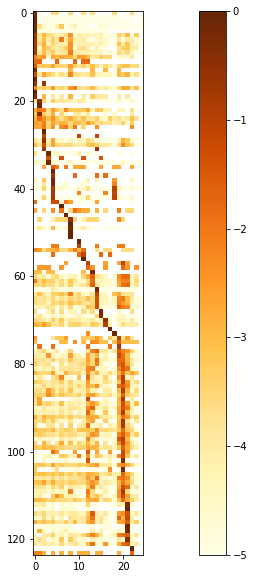

In [47]:
# cb = plt.imshow(np.log(norm_d).T,cmap="YlOrBr",vmin=-5)

ii_checked = iiii[iiii.isin(np.log(norm_d).columns)]

cb = plt.imshow(np.log(norm_d)[ii_checked.values].T[chroms],cmap="YlOrBr",vmin=-5)


plt.colorbar(cb)
plt.gcf().set_size_inches(20,10)